In [9]:
import os
import sys
from decimal import Decimal

root_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(root_path)


from data_sources.clob import CLOBDataSource
from research_notebooks.dneitor.utils import read_yaml_to_dict

clob = CLOBDataSource()
config = read_yaml_to_dict('configs/dneitor-binance_0.4.yml')

In [10]:
config

{'id': 'dneitor-binance_0.4',
 'controller_name': 'dneitor',
 'controller_type': 'generic',
 'manual_kill_switch': None,
 'candles_config': [],
 'markets': [{'connector_name': 'binance',
   'trading_pair': 'PEPE-FDUSD',
   'total_amount_quote': 638.82,
   'prices': [1.308e-05,
    1.2522857142857144e-05,
    1.219142857142857e-05,
    1.2007391304347827e-05,
    1.168294117647059e-05,
    1.1338888888888889e-05],
   'amounts_quote_pct': [0.1, 0.1, 0.1, 0.1, 0.2, 0.2],
   'take_profit': 0.0008969487734601755,
   'activation_bounds': 0.002,
   'max_open_orders': 1},
  {'connector_name': 'binance',
   'trading_pair': 'BANANA-FDUSD',
   'total_amount_quote': 378.1,
   'prices': [73.73,
    68.83666666666666,
    65.06333333333333,
    62.26230769230769,
    60.214,
    58.20384615384616],
   'amounts_quote_pct': [0.1, 0.1, 0.1, 0.1, 0.2, 0.2],
   'take_profit': 0.0015420033296261303,
   'activation_bounds': 0.002,
   'max_open_orders': 1},
  {'connector_name': 'binance',
   'trading_pair':

In [11]:
market_configs = config["markets"]
market_configs

[{'connector_name': 'binance',
  'trading_pair': 'PEPE-FDUSD',
  'total_amount_quote': 638.82,
  'prices': [1.308e-05,
   1.2522857142857144e-05,
   1.219142857142857e-05,
   1.2007391304347827e-05,
   1.168294117647059e-05,
   1.1338888888888889e-05],
  'amounts_quote_pct': [0.1, 0.1, 0.1, 0.1, 0.2, 0.2],
  'take_profit': 0.0008969487734601755,
  'activation_bounds': 0.002,
  'max_open_orders': 1},
 {'connector_name': 'binance',
  'trading_pair': 'BANANA-FDUSD',
  'total_amount_quote': 378.1,
  'prices': [73.73,
   68.83666666666666,
   65.06333333333333,
   62.26230769230769,
   60.214,
   58.20384615384616],
  'amounts_quote_pct': [0.1, 0.1, 0.1, 0.1, 0.2, 0.2],
  'take_profit': 0.0015420033296261303,
  'activation_bounds': 0.002,
  'max_open_orders': 1},
 {'connector_name': 'binance',
  'trading_pair': 'BONK-FDUSD',
  'total_amount_quote': 277.0,
  'prices': [3.341e-05,
   3.1110000000000005e-05,
   3.0243571428571428e-05,
   2.9386666666666664e-05,
   2.7822e-05,
   2.637916666666

In [12]:
import asyncio

# We are going to get the last 7 days of candles for each market and add it to the markets dictionary

tasks = [clob.get_candles_last_days(
    connector_name=market_config["connector_name"],
    trading_pair=market_config["trading_pair"],
    interval="15m",
    days=7,
) for market_config in market_configs]

candles = await asyncio.gather(*tasks)
for candle, market_config in zip(candles, market_configs):
    market_config["candles"] = candle

2024-07-26 18:27:59,508 - asyncio - ERROR - Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x302670280>
2024-07-26 18:27:59,508 - asyncio - ERROR - Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x3026a9ba0>, 16419.054052958)]']
connector: <aiohttp.connector.TCPConnector object at 0x302670160>
2024-07-26 18:27:59,550 - asyncio - ERROR - Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x30266f5b0>
2024-07-26 18:27:59,551 - asyncio - ERROR - Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x3026a94e0>, 16419.10121225)]']
connector: <aiohttp.connector.TCPConnector object at 0x30266f6d0>
2024-07-26 18:27:59,564 - asyncio - ERROR - Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x30266ce20>
2024-07-26 18:27:59,565 - asyncio - ERROR - Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x3026

In [13]:
market_config

{'connector_name': 'binance',
 'trading_pair': 'LISTA-FDUSD',
 'total_amount_quote': 101.24,
 'prices': [0.6324, 0.60312, 0.58607, 0.5636782608695653, 0.5442, 0.5205],
 'amounts_quote_pct': [0.1, 0.1, 0.1, 0.1, 0.2, 0.2],
 'take_profit': 0.0008008098617339932,
 'activation_bounds': 0.002,
 'max_open_orders': 1,
 'candles': <data_structures.candles.Candles at 0x302670ee0>}

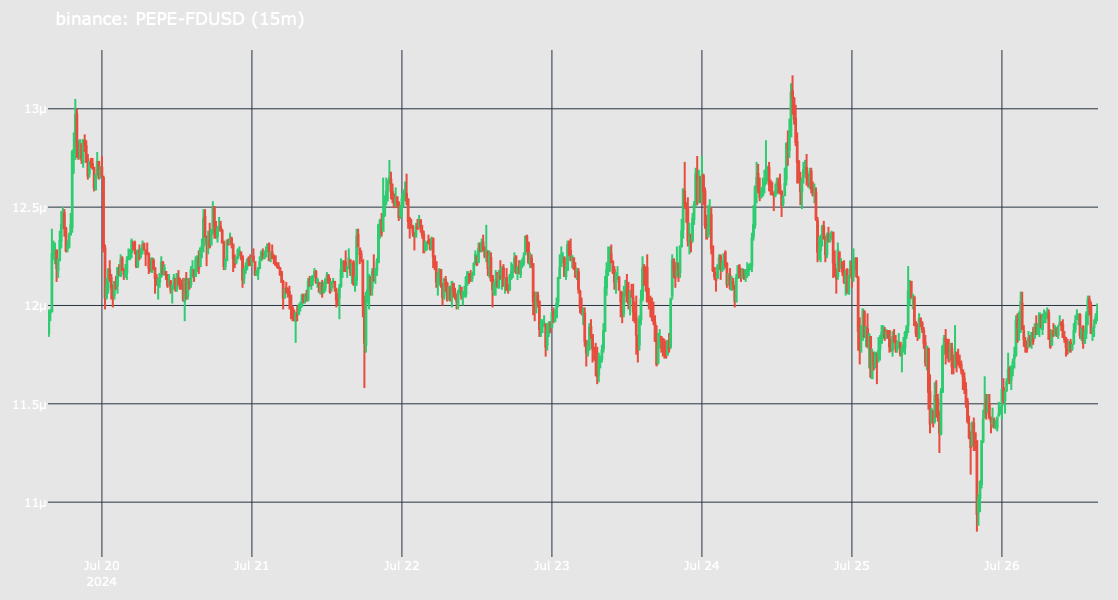

In [14]:
# We are going to visualize one of the candles
candles_example = market_configs[0]["candles"]
candles_example.plot("candles")

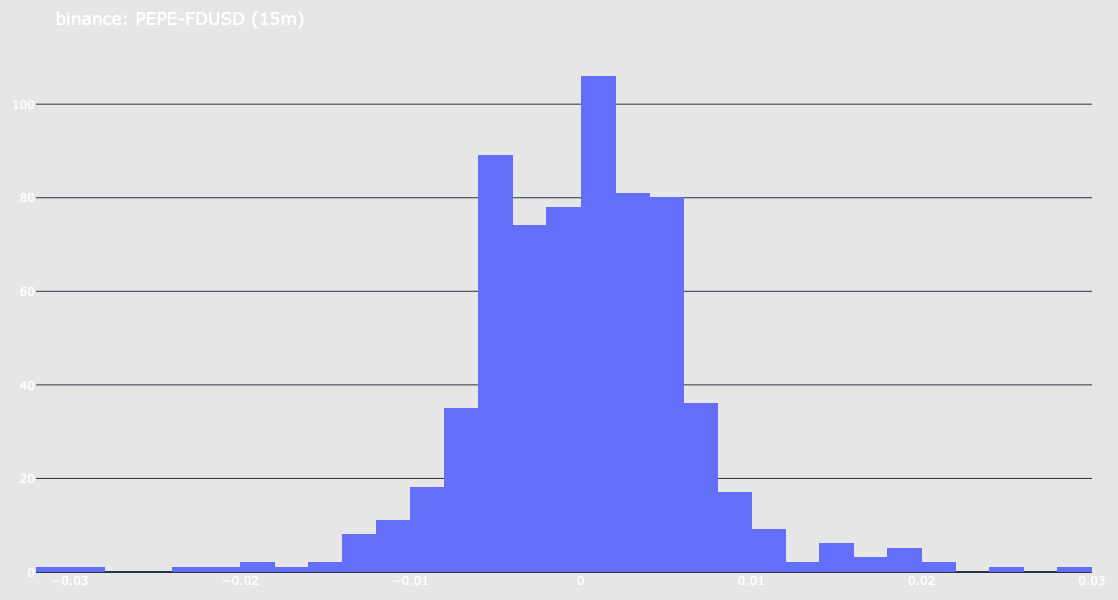

In [15]:
candles_example.plot("returns")

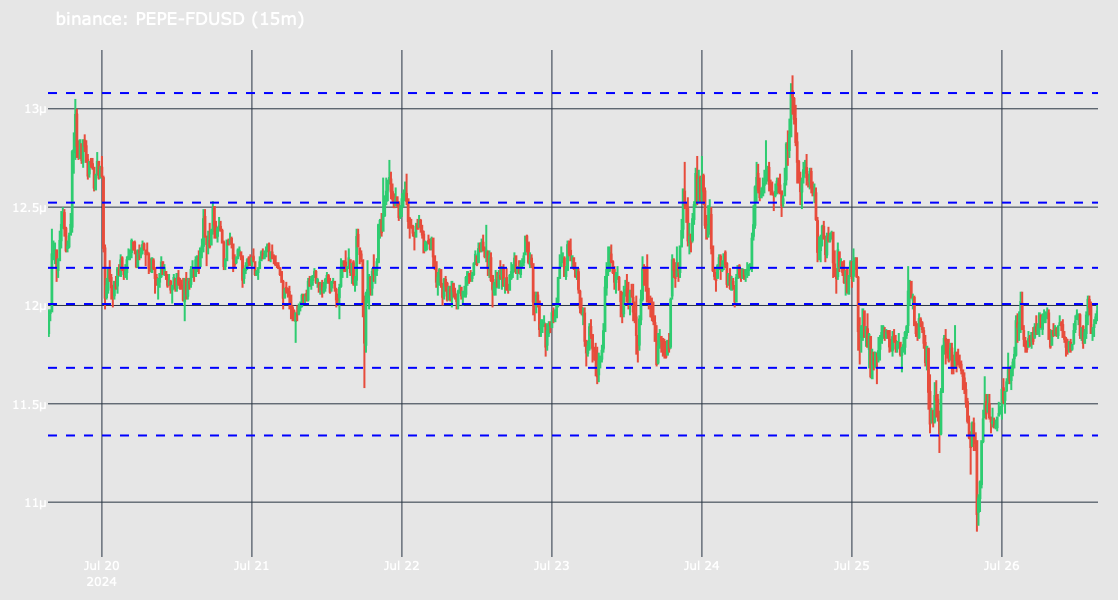

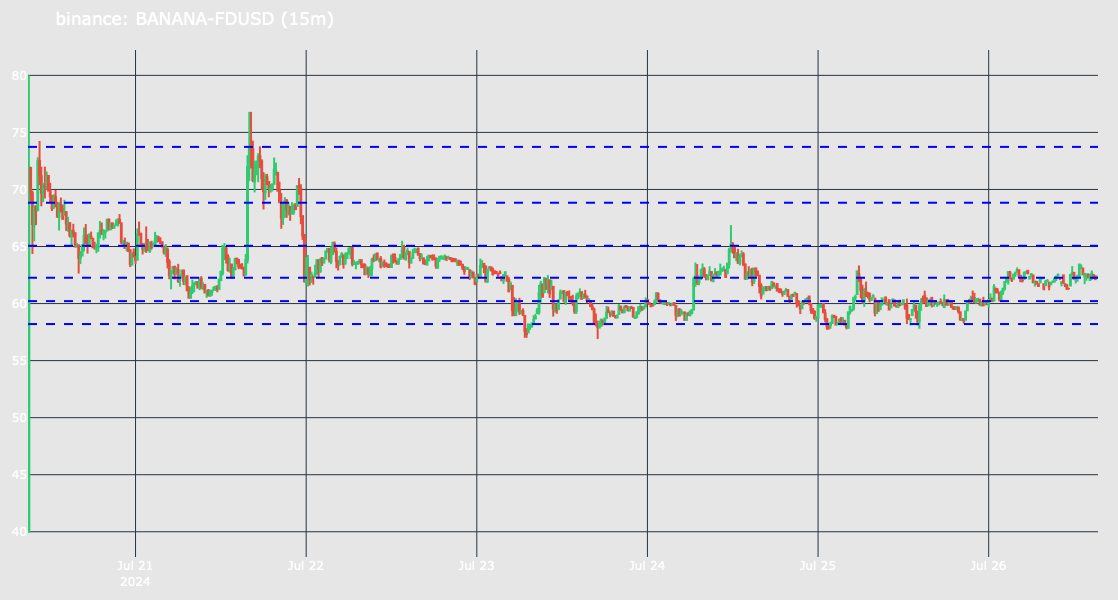

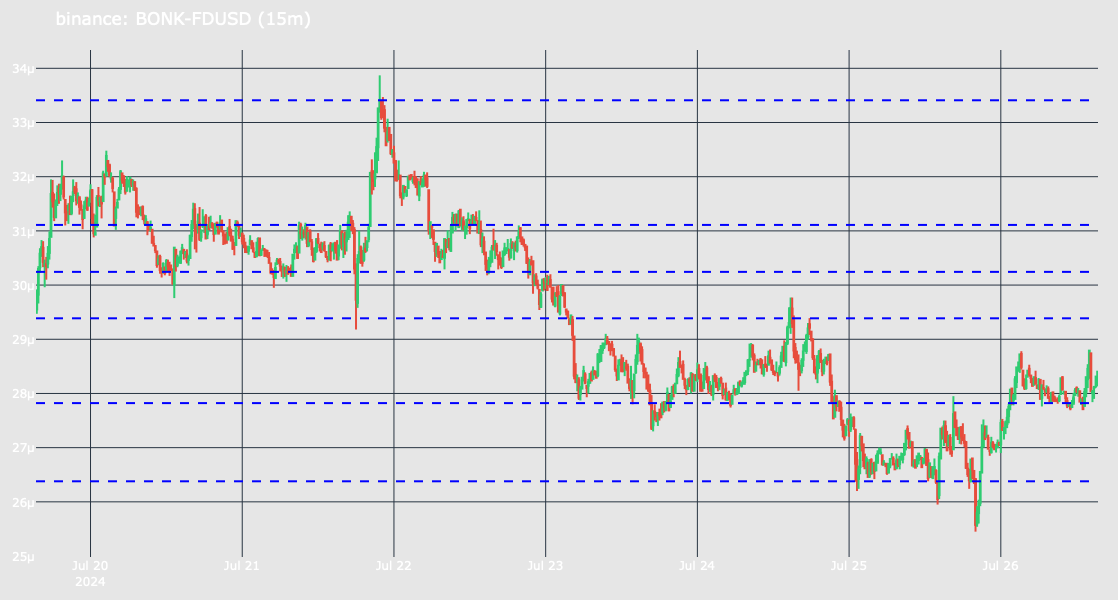

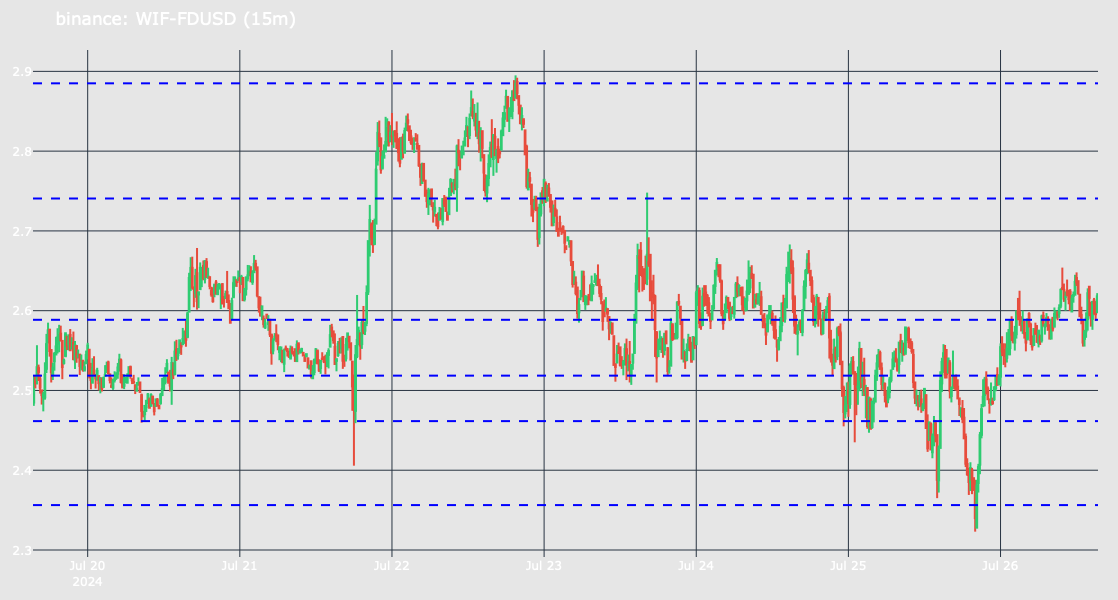

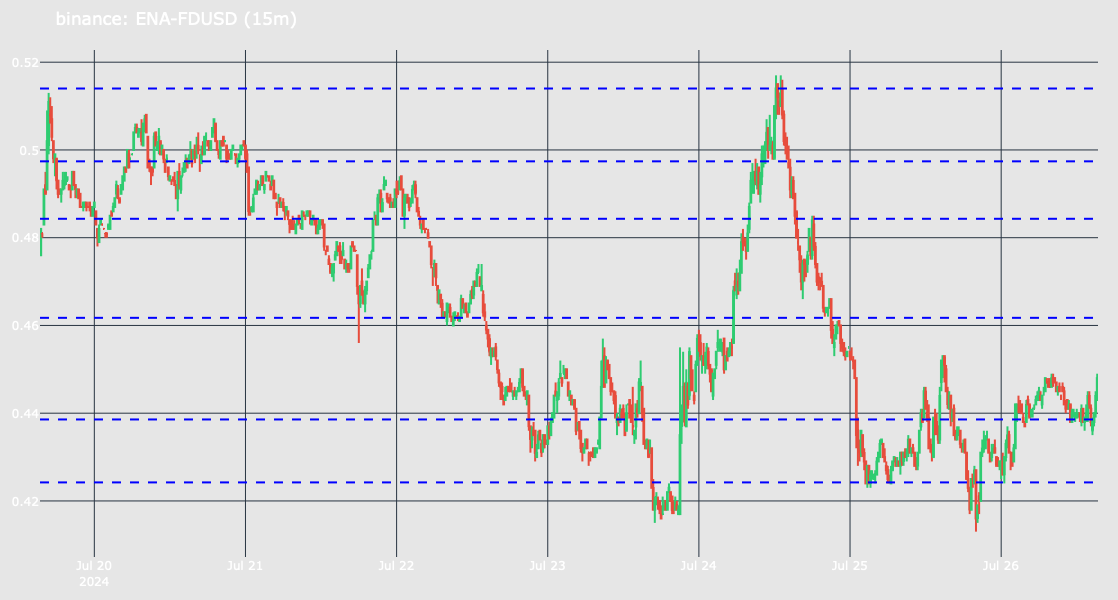

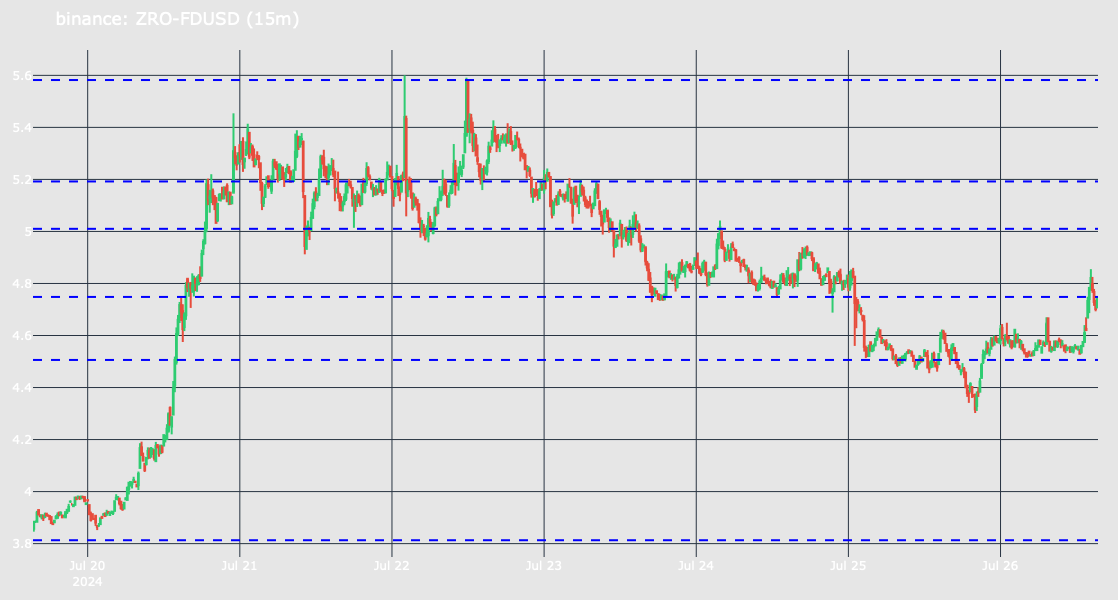

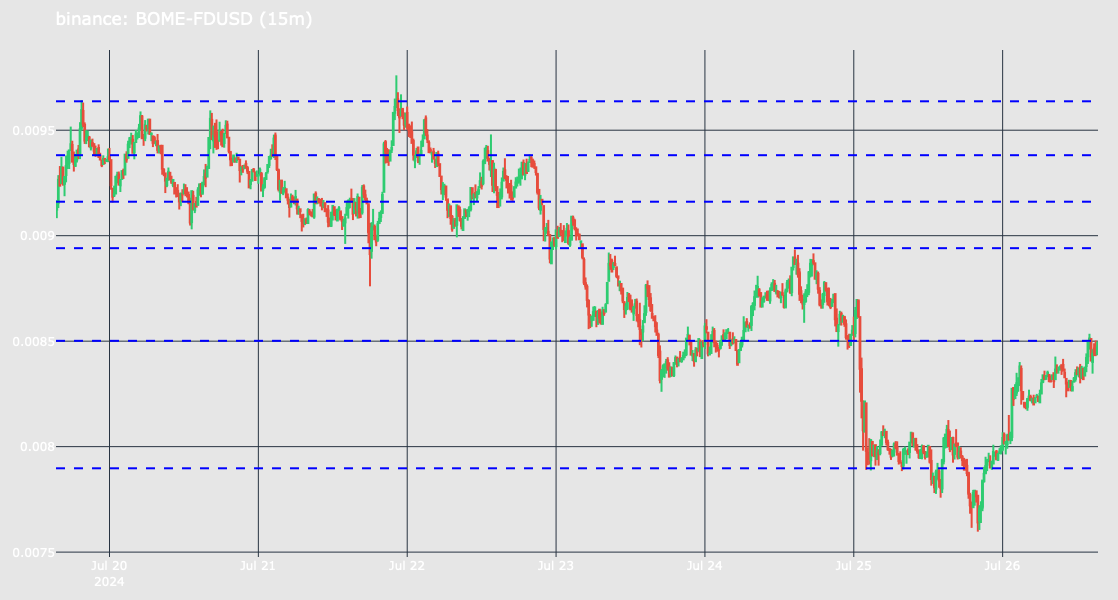

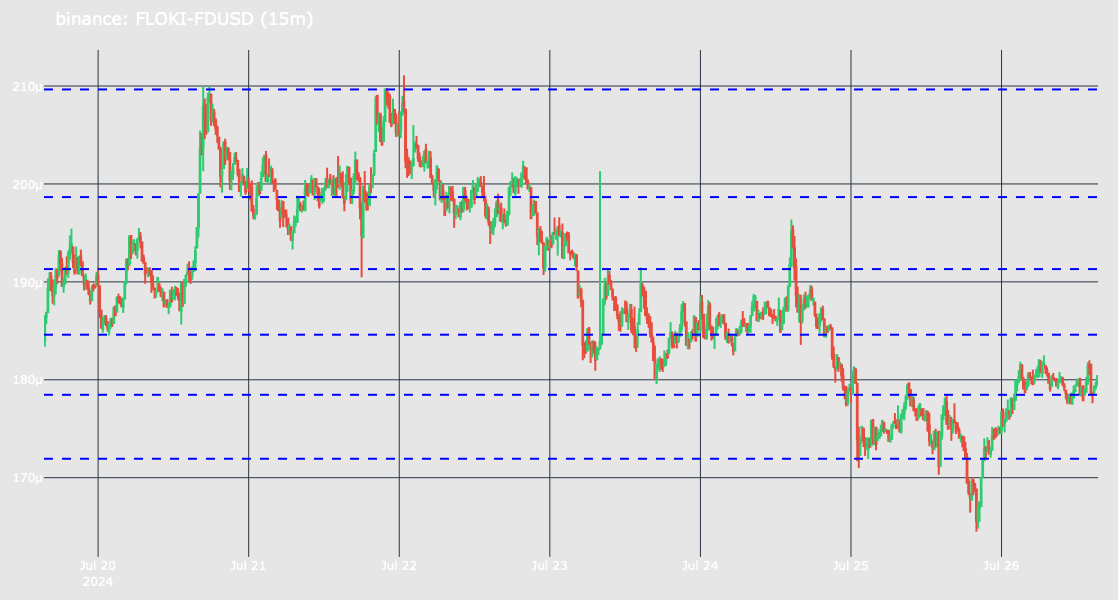

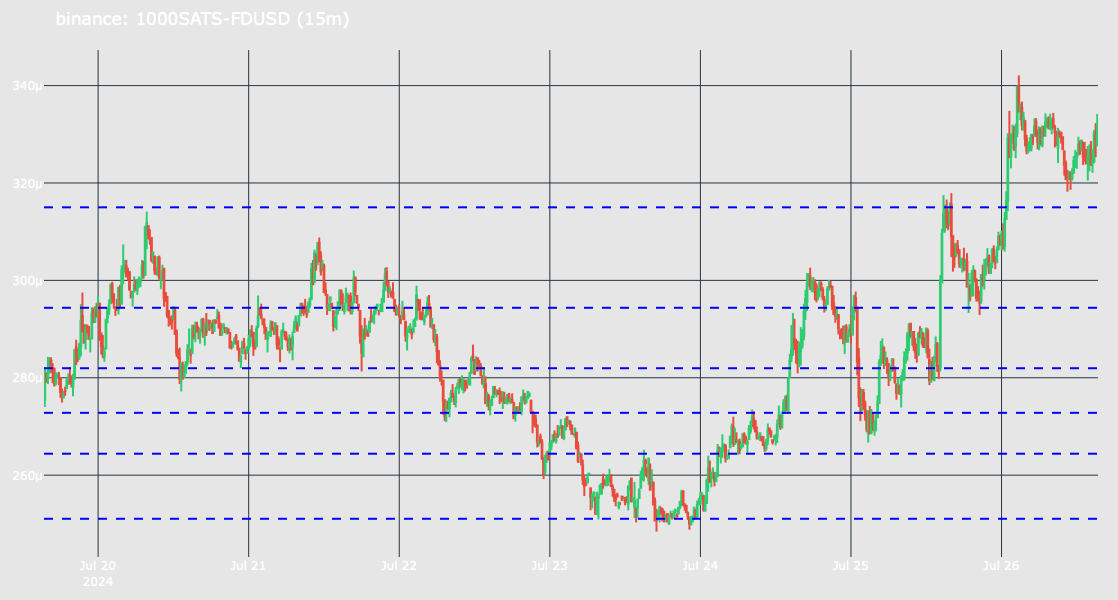

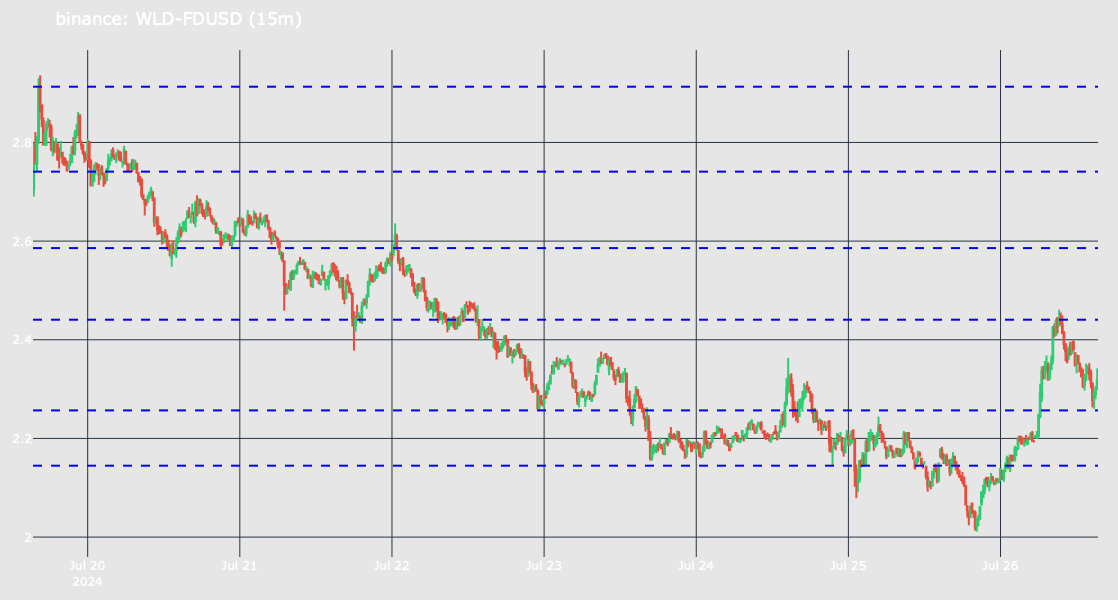

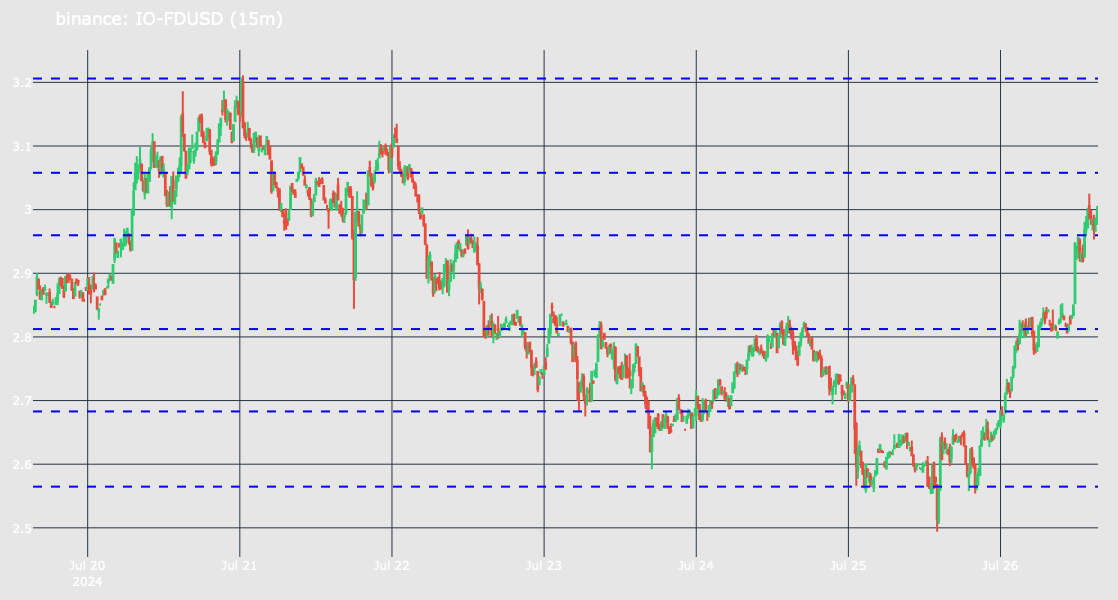

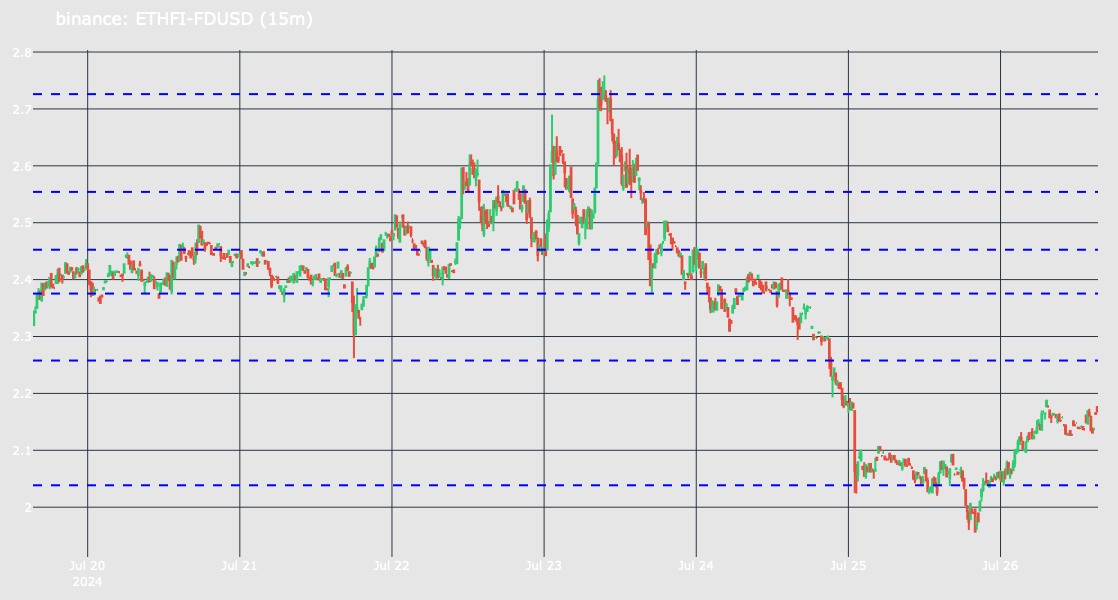

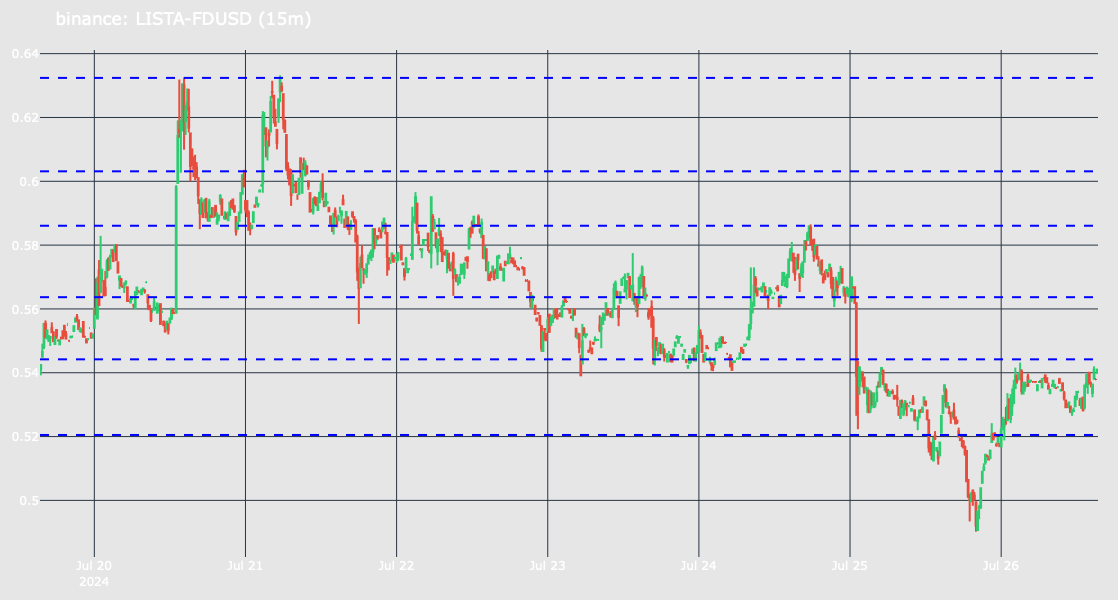

In [16]:
for config in market_configs:
    fig = config["candles"].fig("candles")
    for price in config['prices']:
        fig.add_hline(y=price, line=dict(color='blue', dash='dash'))
    fig.show()